In [ ]:
#from google.colab import files
#uploaded=files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile("drive/My Drive/resize128.zip","r") as zip_ref:
  zip_ref.extractall()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras import utils as np_utils
%matplotlib inline
train = pd.read_csv('drive/My Drive/Traindata.csv')
TRAIN_PATH = 'resize128/'
from PIL import Image
from imageio import imread
from skimage.transform import resize
import cv2
from tqdm import tqdm

# defining a function to read images
def read_img(img_path):
    img = image.load_img(img_path, target_size=[128, 128,1],grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    return img

# reading the images
train_img = []
for img_path in tqdm(train.Image.values):
    train_img.append(read_img(TRAIN_PATH + img_path))



  0%|          | 0/28164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 28164/28164 [00:12<00:00, 2231.53it/s]


In [ ]:
X_train = np.array(train_img)
print("Length of total input:",len(X_train))
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(train.Label.values)
Y_train = lb.transform(train.Label.values)
Y_train=Y_train.astype(np.int32)
Y_train = np_utils.to_categorical(Y_train)
split_size = int(X_train.shape[0]*0.7)
x_train, x_test = X_train[:split_size], X_train[split_size:]
y_train, y_test = Y_train[:split_size], Y_train[split_size:]
print(x_train.shape, x_test.shape,)
print(y_train.shape, y_test.shape)
print(len(y_test))

Length of total input: 28164
(19714, 128, 128, 1) (8450, 128, 128, 1)
(19714, 10) (8450, 10)
8450


In [ ]:
image_shape = x_train.shape[1:]
n_classes = y_train.shape[1]
print("Number of training examples =", x_train.shape[0])
print("Number of testing examples =", x_test.shape[0])
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 19714
Number of testing examples = 8450
Image data shape = (128, 128, 1)
Number of classes = 10


In [ ]:

# Each image's dimension is 100 x 100
img_rows, img_cols = 128, 128
input_shape = (img_rows, img_cols, 1)

In [ ]:
#https://keras.io/api/optimizers/
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras import regularizers


cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())
#cnn4.add(MaxPooling2D(pool_size=(2, 2)))


cnn4.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(MaxPooling2D(pool_size=(2, 2)))

cnn4.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(MaxPooling2D(pool_size=(2, 2)))


cnn4.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
cnn4.add(BatchNormalization())
#cnn4.add(MaxPooling2D(pool_size=(2, 2)))


cnn4.add(Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(7, 7), padding='same', activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(7, 7), padding='same', activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(256, kernel_size=(7, 7), padding='same', activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(256, kernel_size=(9, 9), padding='same', activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(512, kernel_size=(9, 9), padding='same', activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
#cnn4.add(Dropout(0.25))


cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.25))

cnn4.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.25))

cnn4.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)))
cnn4.add(BatchNormalization())
#cnn4.add(Dropout(0.25))

cnn4.add(Dense(10, activation='softmax'))

In [ ]:
'''from keras.optimizers import Adam
cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,),
              metrics=['accuracy'])'''
from keras.optimizers import SGD
cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=SGD(learning_rate=0.001, momentum=0.0, nesterov=False,),
              metrics=['accuracy'])

'''
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD", **kwargs
)


tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
    **kwargs
)

tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
)

tf.keras.optimizers.Adadelta(
    learning_rate=0.001, rho=0.95, epsilon=1e-07, name="Adadelta", **kwargs
)

tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad",
    **kwargs
)

tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax", **kwargs
)

tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam", **kwargs
)

tf.keras.optimizers.Ftrl(
    learning_rate=0.001,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.0,
    l2_regularization_strength=0.0,
    name="Ftrl",
    l2_shrinkage_regularization_strength=0.0,
    beta=0.0,
    **kwargs
)'''

'\ntf.keras.optimizers.SGD(\n    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD", **kwargs\n)\n\n\ntf.keras.optimizers.RMSprop(\n    learning_rate=0.001,\n    rho=0.9,\n    momentum=0.0,\n    epsilon=1e-07,\n    centered=False,\n    name="RMSprop",\n    **kwargs\n)\n\ntf.keras.optimizers.Adam(\n    learning_rate=0.001,\n    beta_1=0.9,\n    beta_2=0.999,\n    epsilon=1e-07,\n    amsgrad=False,\n    name="Adam",\n    **kwargs\n)\n\ntf.keras.optimizers.Adadelta(\n    learning_rate=0.001, rho=0.95, epsilon=1e-07, name="Adadelta", **kwargs\n)\n\ntf.keras.optimizers.Adagrad(\n    learning_rate=0.001,\n    initial_accumulator_value=0.1,\n    epsilon=1e-07,\n    name="Adagrad",\n    **kwargs\n)\n\ntf.keras.optimizers.Adamax(\n    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax", **kwargs\n)\n\ntf.keras.optimizers.Nadam(\n    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam", **kwargs\n)\n\ntf.keras.optimizers.Ftrl(\n    learning

In [ ]:
cnn4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 122, 122, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 118, 118, 64)      102464    
_________________________________________________________________
batch_normalization_2 (Batch (None, 118, 118, 64)      256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 114, 114, 64)      1

In [ ]:
history3 = cnn4.fit(x_train, y_train,
          batch_size=32, epochs=50, verbose=1, validation_data=(x_test, y_test))

Epoch 1/50
617/617 [==============================] - 232s 310ms/step - loss: 29.9984 - accuracy: 0.5539 - val_loss: 664.8297 - val_accuracy: 0.1956
Epoch 2/50
617/617 [==============================] - 195s 316ms/step - loss: 25.1590 - accuracy: 0.7207 - val_loss: 315.9102 - val_accuracy: 0.1885
Epoch 3/50
617/617 [==============================] - 195s 316ms/step - loss: 23.1444 - accuracy: 0.7720 - val_loss: 40.2018 - val_accuracy: 0.3480
Epoch 4/50
617/617 [==============================] - 195s 317ms/step - loss: 21.9104 - accuracy: 0.8098 - val_loss: 42.9687 - val_accuracy: 0.1527
Epoch 5/50
617/617 [==============================] - 195s 316ms/step - loss: 21.1073 - accuracy: 0.8328 - val_loss: 111.6036 - val_accuracy: 0.3407
Epoch 6/50
617/617 [==============================] - 195s 317ms/step - loss: 20.4461 - accuracy: 0.8406 - val_loss: 34.5694 - val_accuracy: 0.5543
Epoch 7/50
617/617 [==============================] - 195s 316ms/step - loss: 19.6968 - accuracy: 0.8852 - va

In [ ]:
loss, accuracy=cnn4.evaluate(x_test, y_test, verbose=0)
print(accuracy*100)
print(loss)

75.94082951545715
7.255326747894287


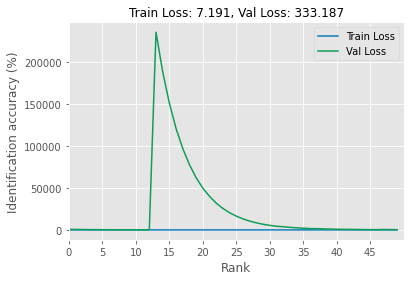

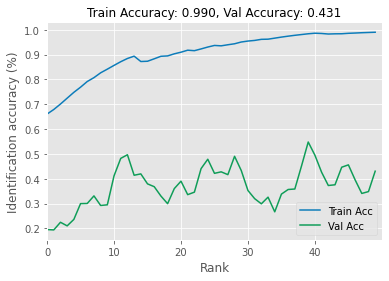

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import pickle
cnn4.save('Model_Texture.h5')
save_history(history3, 'hist1.bin')
history=load_history('hist1.bin')
plot_compare(history)

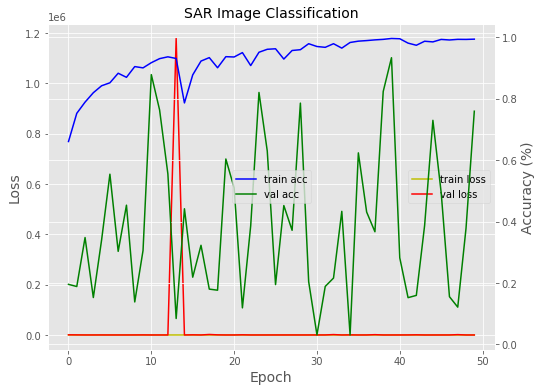

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(8,6))
acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('Epoch',fontname='Times New Roman Bold', fontsize=14)
loss_ax.set_ylabel('Loss',fontname='Times New Roman Bold', fontsize=14)
loss_ax.legend(loc='right')

acc_ax.plot(history3.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history3.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('Accuracy (%)',fontname='Times New Roman Bold', fontsize=14)
acc_ax.set_title('SAR Image Classification',fontname='Times New Roman Bold', fontsize=14)
acc_ax.legend(loc='center')

plt.show()

In [ ]:
def save_history(history, fn):
    with open(fn, 'wb') as fw:
        pickle.dump(history.history, fw, protocol=2)

def load_history(fn):
    class Temp():
        pass
    history = Temp()
    with open(fn, 'rb') as fr:
        history.history = pickle.load(fr)
    return history

def jitter(img, amount=32):
    ox, oy = np.random.randint(-amount, amount+1, 2)
    return np.roll(np.roll(img, ox, -1), oy, -2), ox, oy

def reverse_jitter(img, ox, oy):
    return np.roll(np.roll(img, -ox, -1), -oy, -2)

def plot_image(img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')

In [ ]:
def plot_compare(history, steps=-1):
    if steps < 0:
        steps = len(history.history['accuracy'])
    acc = smooth_curve(history.history['accuracy'][:steps])
    val_acc = smooth_curve(history.history['val_accuracy'][:steps])
    loss = smooth_curve(history.history['loss'][:steps])
    val_loss = smooth_curve(history.history['val_loss'][:steps])

    plt.figure(figsize=(6, 4))
    plt.plot(loss, c='#0c7cba', label='Train Loss')
    plt.plot(val_loss, c='#0f9d58', label='Val Loss')
    plt.xticks(range(0, len(loss), 5))
    plt.xlim(0, len(loss))
    plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank',)

    plt.figure(figsize=(6, 4))
    plt.plot(acc, c='#0c7cba', label='Train Acc')
    plt.plot(val_acc, c='#0f9d58', label='Val Acc')
    plt.xticks(range(0, len(acc), 10))
    plt.xlim(0, len(acc))
    plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
    plt.legend()
    plt.ylabel('Identification accuracy (%)')
    plt.xlabel('Rank')

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed = []
    for point in points:
        if smoothed:
            previous = smoothed[-1]
            smoothed.append(previous * factor + point * (1 - factor))
        else:
            smoothed.append(point)
    return smoothed

In [ ]:
from sklearn.metrics import confusion_matrix
y_hat = cnn4.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(y_hat)
print(cm)

[[4.6371450e-05 3.8107007e-06 7.7922732e-06 ... 6.3118234e-05
  9.9194819e-01 7.2511146e-03]
 [2.1106552e-04 2.0812981e-06 9.0410404e-06 ... 6.4026809e-04
  1.2094372e-05 2.0923695e-04]
 [4.3257012e-04 2.0512813e-05 9.8936194e-01 ... 1.1375888e-03
  2.9723585e-06 3.5115269e-03]
 ...
 [4.0682706e-05 1.5655053e-03 6.3884755e-07 ... 5.1530980e-04
  1.2660918e-07 9.9752480e-01]
 [3.0771237e-06 2.7233348e-08 5.8354127e-10 ... 2.2630616e-04
  6.5501460e-08 1.4607161e-06]
 [1.0829768e-03 9.2253404e-06 4.4190045e-05 ... 1.2585186e-04
  1.5819585e-04 4.0403297e-04]]
[[1102    0    0    0    1    0    0    0    0    5]
 [   0  976    0    0    0    0    0    0    1   94]
 [   1   18  480    0   64    0    0    0    0  542]
 [   1    0    0 1020   16    3    4   32    7   30]
 [   0    2    2    1  988    0    1    5    0   23]
 [   0    2    1   17  153  347   22   37    0  375]
 [  16    4    0   53    0    1  239    0    1  118]
 [   0    0    0    6    1    0    1  437    1    6]
 [   1    0 

In [ ]:
from sklearn.metrics import jaccard_similarity_score
sim1 = jaccard_similarity_score(y_true, y_pred)
sim1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7594082840236687

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

confusion_matrix(y_true, y_pred)

array([[1084,    0,    0,    0,    0,    0,   24,    0,    0,    0],
       [   0,  765,  293,    2,    2,    0,    0,    0,    4,    5],
       [   0,    2, 1088,    0,   14,    0,    0,    0,    1,    0],
       [   1,    0,   57,  974,   25,   21,    1,    2,   24,    8],
       [   0,    0,   42,    5,  968,    1,    0,    0,    3,    3],
       [   0,    0,   65,   40,  146,  692,    1,    3,    4,    3],
       [  40,    5,   56,   42,    9,    7,  190,    0,   28,   55],
       [   0,    0,    3,  337,   43,    2,    0,   40,   26,    1],
       [   2,    2,   21,   36,   16,    0,    6,    4,  821,   25],
       [  12,    0,   28,    8,    4,    0,   29,    0,   32,  147]])

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.grid(False)
    plt.show()


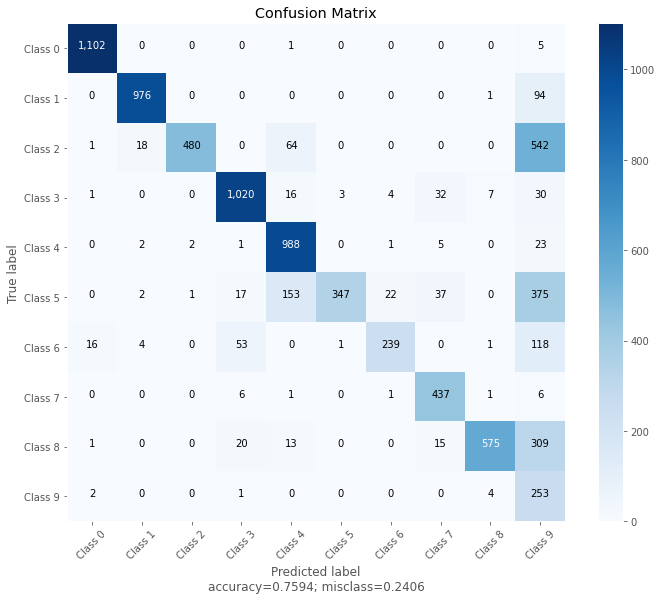

In [ ]:
plot_confusion_matrix(cm,
                      normalize    = False,
                      target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9'],
                      title        = "Confusion Matrix")

Text(0.5, 33.0, 'Predicted label')

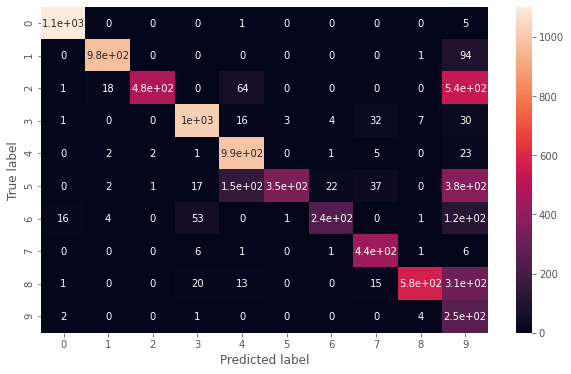

In [ ]:
import seaborn as sns
df_cm=pd.DataFrame(cm)
plt.figure(figsize=(10,6))
sns.heatmap(df_cm,annot=True)
#plt.title("CNN Accuracy:{:6.5f}".format(hist1.history["val_acc"][-1]))
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(cnn4.predict(x_test), axis=1)
y_true1 = np.argmax(y_test, axis=1)
y_true=y_true1.astype(np.int64)

In [ ]:
target_names= ['Class 0','Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5','Class 6','Class 7','Class 8','Class 9']
print(classification_report(y_true, y_pred,target_names=target_names))
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99      1108
     Class 1       0.97      0.91      0.94      1071
     Class 2       0.99      0.43      0.60      1105
     Class 3       0.91      0.92      0.91      1113
     Class 4       0.80      0.97      0.88      1022
     Class 5       0.99      0.36      0.53       954
     Class 6       0.90      0.55      0.68       432
     Class 7       0.83      0.97      0.89       452
     Class 8       0.98      0.62      0.76       933
     Class 9       0.14      0.97      0.25       260

    accuracy                           0.76      8450
   macro avg       0.85      0.77      0.74      8450
weighted avg       0.91      0.76      0.79      8450

[[1102    0    0    0    1    0    0    0    0    5]
 [   0  976    0    0    0    0    0    0    1   94]
 [   1   18  480    0   64    0    0    0    0  542]
 [   1    0    0 1020   16    3    4   32    7   30]
 [   0    2    2    1  988   

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision (micro): %f" % precision_score(y_pred, y_true, average='micro'))
print("Recall (micro):    %f" % recall_score(y_pred, y_true, average='micro'))
print("F1 score (micro):  %f" % f1_score(y_pred, y_true, average='micro'), end='\n\n')

print("Precision (macro): %f" % precision_score(y_pred, y_true, average='macro'))
print("Recall (macro):    %f" % recall_score(y_pred, y_true, average='macro'))
print("F1 score (macro):  %f" % f1_score(y_pred, y_true, average='macro'), end='\n\n')

print("Precision (weighted): %f" % precision_score(y_pred, y_true, average='weighted'))
print("Recall (weighted):    %f" % recall_score(y_pred, y_true, average='weighted'))
print("F1 score (weighted):  %f" % f1_score(y_pred, y_true, average='weighted'),end='\n\n')

from sklearn.metrics import cohen_kappa_score
print("kappa_score(micro): %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(macro):    %f" % cohen_kappa_score(y_pred, y_true))
print("kappa_score(weighted):  %f" % cohen_kappa_score(y_pred, y_true))

Precision (micro): 0.759408
Recall (micro):    0.759408
F1 score (micro):  0.759408

Precision (macro): 0.769660
Recall (macro):    0.849576
F1 score (macro):  0.743956

Precision (weighted): 0.865561
Recall (weighted):    0.759408
F1 score (weighted):  0.730639

kappa_score(micro): 0.733041
kappa_score(macro):    0.733041
kappa_score(weighted):  0.733041


In [ ]:
score1 = cnn4.evaluate(x_test, y_test,verbose=1)

print(score1)

265/265 [==============================] - 23s 87ms/step - loss: 7.2553 - accuracy: 0.7594
[7.255326747894287, 0.7594082951545715]


In [ ]:
y_testpred = cnn4.predict(x_test)

In [ ]:
pred_labels = []
for i in range(10):
    r = np.round(np.array(np.exp(y_hat[i])/sum(np.exp(y_hat[i]))),1).argmax()
    print(r)
    if r ==0 : pred_labels.append("0")
    elif r ==1: pred_labels.append("1")
    elif r ==2: pred_labels.append("2")
    elif r ==3: pred_labels.append("3")
    elif r ==4: pred_labels.append("4")
    elif r ==5: pred_labels.append("5")
    elif r ==6: pred_labels.append("6")
    elif r ==7: pred_labels.append("7")
    elif r ==8: pred_labels.append("8")
    elif r ==9: pred_labels.append("9")


8
3
2
3
2
4
0
7
9
9


In [ ]:
images = x_test[:10]
print(images.shape)
print(type(images))

(10, 128, 128, 1)
<class 'numpy.ndarray'>


(10, 128, 128, 1)


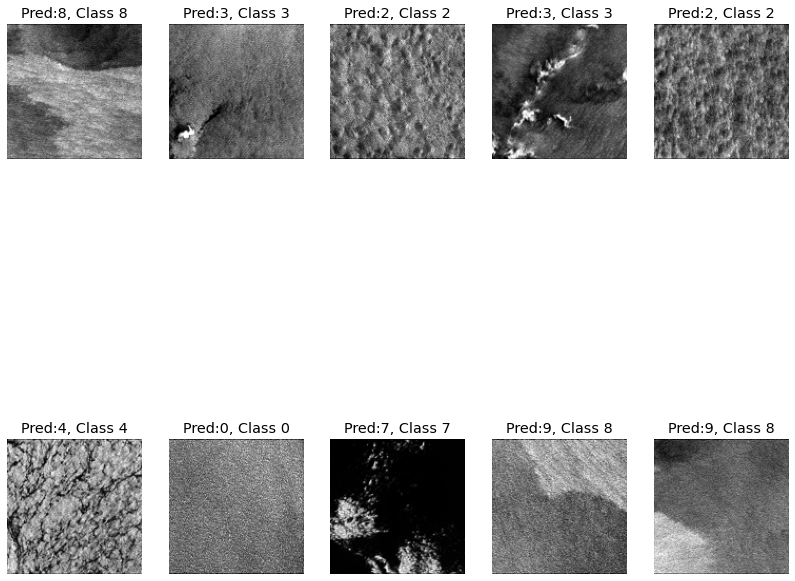

In [ ]:
#Multiple images parameters
import matplotlib.pyplot as plt
w=128
h=128
columns = 5
rows = 2
images = x_test[:10]
print(images.shape)
fig = plt.figure(figsize=(14, 14))
for m in range(1, columns*rows +1):
    img = images[m-1].reshape([128, 128])
    fig.add_subplot(rows, columns, m)
    plt.imshow(img,cmap='gray')
    plt.title("Pred:{}, Class {}".format(pred_labels[m-1], y_true[m-1]))
    #plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.axis('off')
    plt.grid(False)
plt.show()

In [ ]:
predicted_classes = cnn4.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print(predicted_classes.shape,y_test.shape)

(8450,) (8450, 10)


Found 1 incorrect labels


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


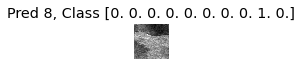

In [ ]:
incorrect = np.where(predicted_classes!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(128,128), interpolation='none', cmap='gray')
    plt.title("Pred {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()

In [ ]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(64,64), interpolation='none', cmap='gray')
    plt.title("Pred {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.grid(False)
    plt.axis('off')
    plt.tight_layout()

Found 0 correct labels


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [ ]:
print(predicted_classes[0:100])
print(y_test[0:100])

[8 3 2 3 2 4 0 7 9 9 0 8 2 9 9 1 1 9 7 0 7 0 9 3 3 1 7 4 0 0 0 0 2 2 0 1 3
 0 9 2 4 1 1 4 2 3 8 0 9 9 9 9 1 4 9 9 8 0 0 4 7 9 4 8 7 1 4 1 4 1 1 3 3 3
 4 9 7 2 1 5 9 8 8 9 0 3 7 3 7 0 2 2 9 5 1 5 9 4 9 9]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0.

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    t = y_test[:, i]
    s = y_pred
    precision[i], recall[i], _ = precision_recall_curve(t, s)
    average_precision[i] = average_precision_score(t, s)

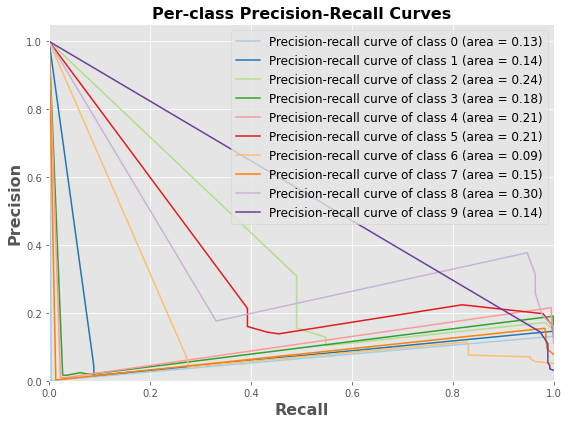

In [ ]:
# Plot Precision-Recall curve for each class
colors = ('#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928')
fig, ax = plt.subplots(figsize=(8,6))
#ax.set_axis_bgcolor('white')
for cl, co in zip(range(n_classes), colors):
    plt.plot(recall[cl], precision[cl], color=co,
             label='Precision-recall curve of class {} (area = {:.2f})'.format(cl, average_precision[cl]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', size=16, weight='bold')
plt.ylabel('Precision', size=16, weight='bold')
plt.title('Per-class Precision-Recall Curves', size=16, weight='bold')
plt.legend(loc="upper right", prop={'size':12})
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_value, mae_value = cnn4.evaluate(x_test, y_testpred, verbose=0)
print("Mean Squared Error (MSE)=",mse_value)
print("Mean Absolute Error (MAE)=",mae_value)
print("Mean Squared Error (MSE)=",mean_squared_error(y_testpred, y_test))
print("Mean Absolute Error (MAE)=",mean_absolute_error(y_testpred, y_test))
print ("R^2 is: \n", r2_score(y_test, y_testpred))
print ('RMSE is: \n', np.sqrt(mean_squared_error(y_test, y_testpred)))

Mean Squared Error (MSE)= 6.657044887542725
Mean Absolute Error (MAE)= 1.0
Mean Squared Error (MSE)= 0.037323795
Mean Absolute Error (MAE)= 0.052505016
R^2 is: 
 0.30227105635701407
RMSE is: 
 0.19319367


In [ ]:
def leaf(n) :
  if n==0 :
    yield ['leaf']
  else :
    for k in range(0,n) :
      for l in leaf(k) :
        for r in leaf(n-1-k) :
           yield [l]+r